<a href="https://colab.research.google.com/github/sireemsbm/dataanalytics/blob/main/Hands_on_Lab_Exploratory_Data_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA.


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [ ]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [ ]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [ ]:
import numpy as np
df['RemoteWork'].isnull().sum()

10631

In [ ]:
df['RemoteWork'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: RemoteWork
Non-Null Count  Dtype 
--------------  ----- 
54806 non-null  object
dtypes: object(1)
memory usage: 511.4+ KB


In [ ]:
df['RemoteWork'].head()

,RemoteWork
0,Remote
1,Remote
2,Remote
3,NaN
4,NaN


In [ ]:
## Write your code here
categorical_columns = df.select_dtypes(include=['object']).columns

df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))


In [ ]:
df['Employment'].isnull().sum()

0

In [ ]:
df['RemoteWork'].isnull().sum()

0

In [ ]:
df['JobSat'].isnull().sum()

36311

In [ ]:
numerical_columns = df.select_dtypes(include=['float64']).columns

df[numerical_columns] = df[numerical_columns].apply(lambda col: col.fillna(col.median()))


In [ ]:
df['JobSat'].isnull().sum()

0

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [ ]:
df['YearsCodePro'].value_counts()

,count
YearsCodePro,
2,17995
3,4093
5,3526
10,3251
4,3215
Less than 1 year,2856
6,2843
1,2639
8,2549


<ipython-input-16-46eaf0994218>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)
<ipython-input-16-46eaf0994218>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()


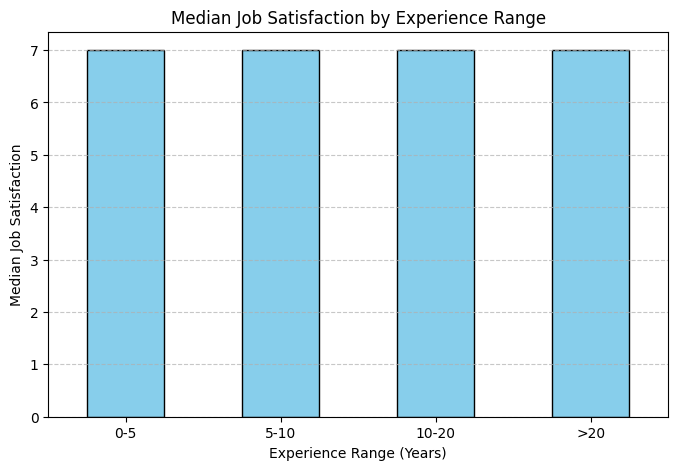

In [ ]:
# Step 1: Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
#Convert YearsCodePro to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Step 2: Calculate median JobSat for each experience range
median_job_sat = df.groupby('ExperienceRange')['JobSat'].median()

# Step 3: Visualize the relationship using a bar plot
plt.figure(figsize=(8, 5))
median_job_sat.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
## Write your code here


In [ ]:
df.columns.to_list()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


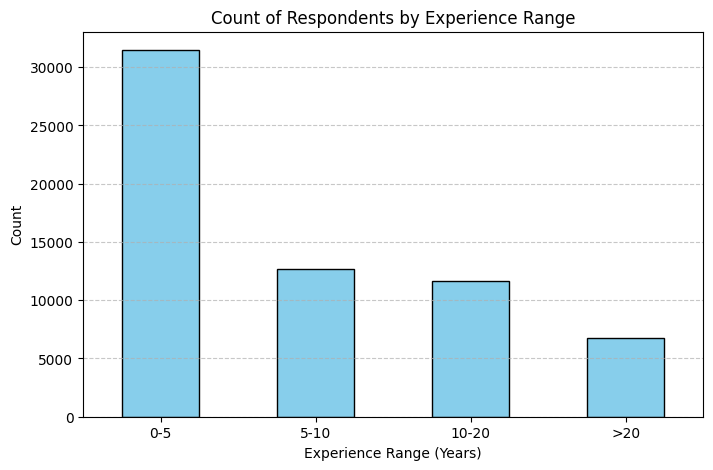

Text(0.5, 0, 'Job Satisfaction Score')

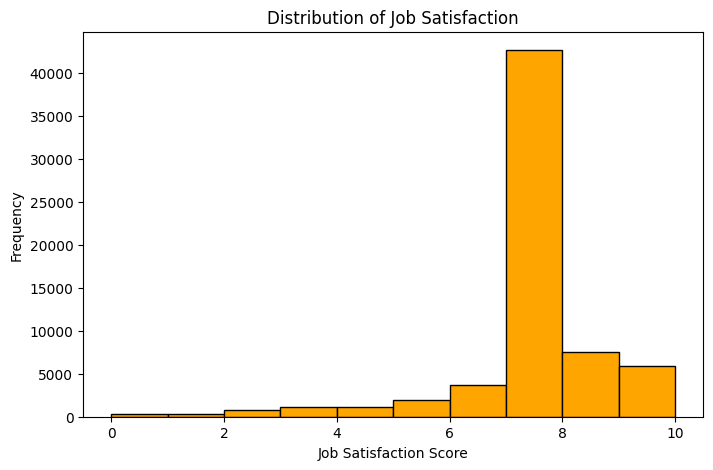

In [ ]:
## Write your code here
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Step 2: Calculate bin value counts
bin_counts = df['ExperienceRange'].value_counts()

# Step 3: Plot bin value counts
plt.figure(figsize=(8, 5))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Respondents by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 4: Plot JobSat distribution
plt.figure(figsize=(8, 5))
df['JobSat'].plot(kind='hist', bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction Score')

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


<ipython-input-19-70b8c6e0721c>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


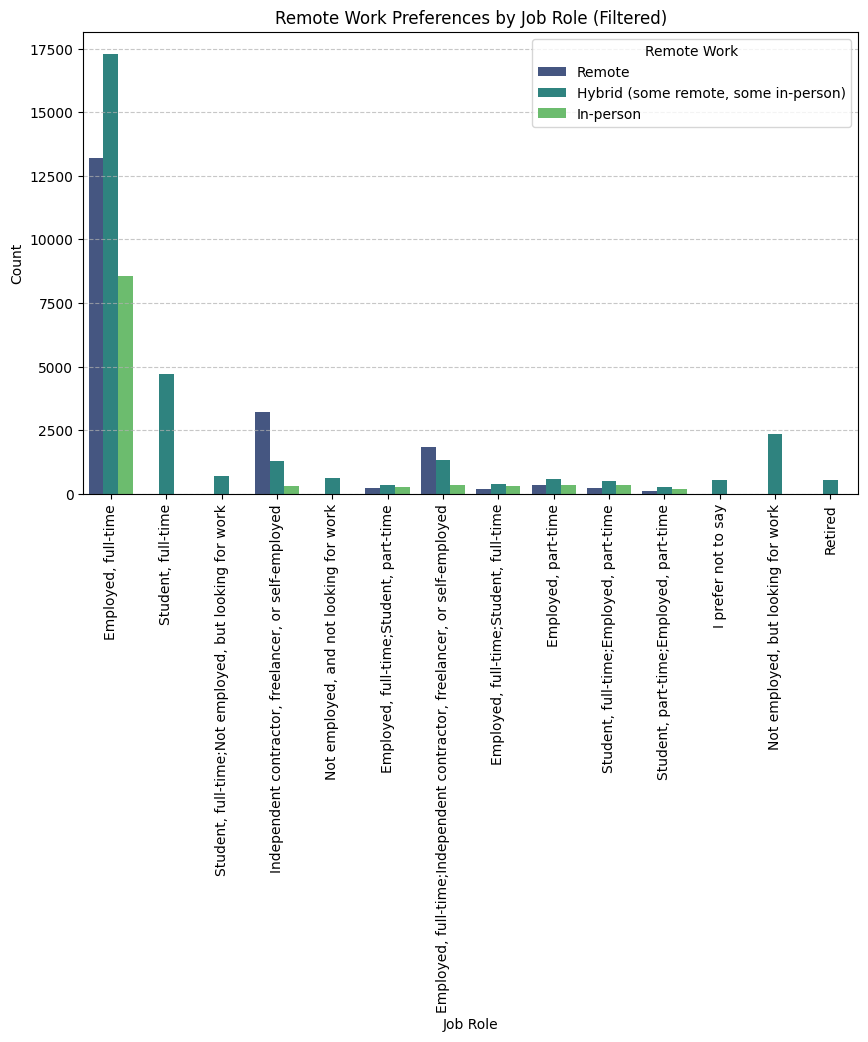

In [ ]:
# Filter out job roles with fewer occurrences
filtered_df = df['Employment'].value_counts()
significant_roles = filtered_df[filtered_df >= 500].index
df_filtered = df[df['Employment'].isin(significant_roles)]

# Create a count plot with filtered data
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=df_filtered, x='Employment', hue='RemoteWork', palette='viridis')
plt.title('Remote Work Preferences by Job Role (Filtered)')
plt.xlabel('Job Role')
plt.ylabel('Count')

# Rotate x-axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.legend(title='Remote Work')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [ ]:
## Write your code here

import seaborn as sns

df['LanguageHaveWorkedWith'].value_counts()



,count
LanguageHaveWorkedWith,
HTML/CSS;JavaScript;TypeScript,6694
Python,832
HTML/CSS;JavaScript;PHP;SQL,503
HTML/CSS;JavaScript,452
C#,452
...,...
Bash/Shell (all shells);Java;JavaScript;Python;Ruby;Scala;SQL,1
Bash/Shell (all shells);Go;Groovy;Haskell;Java;Python,1
Bash/Shell (all shells);C#;C++;HTML/CSS;JavaScript;MATLAB;Python;SQL,1


In [ ]:
data = df[['Country','LanguageHaveWorkedWith']]

In [ ]:
data

,Country,LanguageHaveWorkedWith
0,United States of America,HTML/CSS;JavaScript;TypeScript
1,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2,United Kingdom of Great Britain and Northern I...,C#
3,Canada,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...
4,Norway,C++;HTML/CSS;JavaScript;Lua;Python;Rust
...,...,...
65432,United States of America,HTML/CSS;JavaScript;TypeScript
65433,United States of America,HTML/CSS;JavaScript;TypeScript
65434,United States of America,HTML/CSS;JavaScript;TypeScript
65435,Germany,C;C++;Go;Lua;Objective-C;Python;Rust;SQL


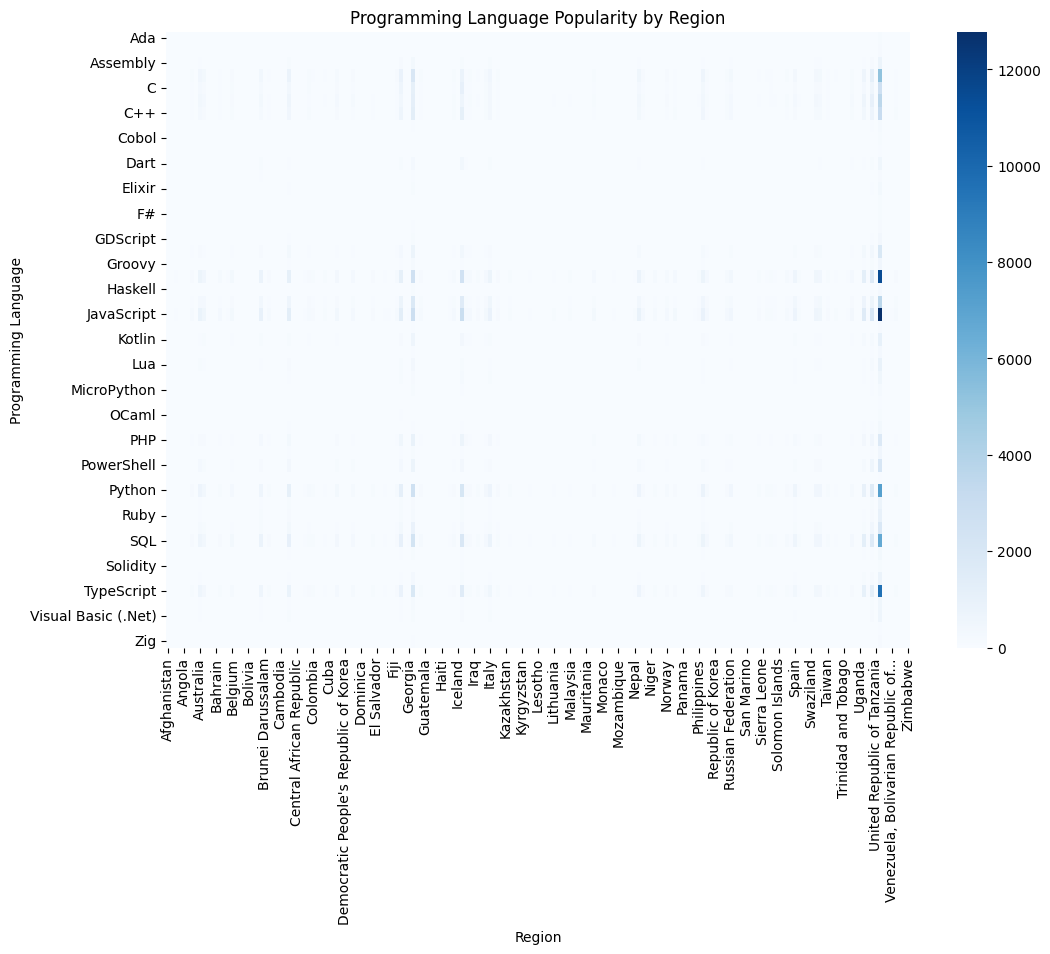

In [ ]:
# Step 1: Split the 'LanguageHaveWorkedWith' column into individual languages
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')

# Step 2: Explode the column so that each language gets its own row
data = df.explode('LanguageHaveWorkedWith')

# Step 3: Count occurrences of each language by country
language_counts = data.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Step 4: Pivot the data for visualization
language_pivot = language_counts.pivot(index='LanguageHaveWorkedWith', columns='Country', values='Count').fillna(0)

# Step 5: Visualize the top languages by region using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(language_pivot, annot=False, cmap='Blues', cbar=True)
plt.title('Programming Language Popularity by Region')
plt.xlabel('Region')
plt.ylabel('Programming Language')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


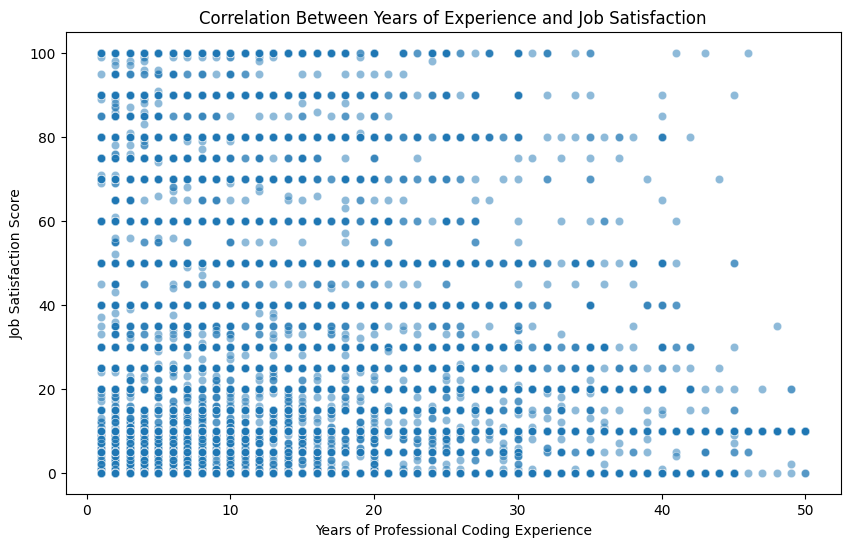

In [ ]:
# Step 8: Correlation Between Experience and Satisfaction
# Scatter plot to visualize relationship between YearsCodePro and JobSatPoints_1
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['YearsCodePro'], y=df['JobSatPoints_1'], alpha=0.5)
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


<Figure size 1200x600 with 0 Axes>

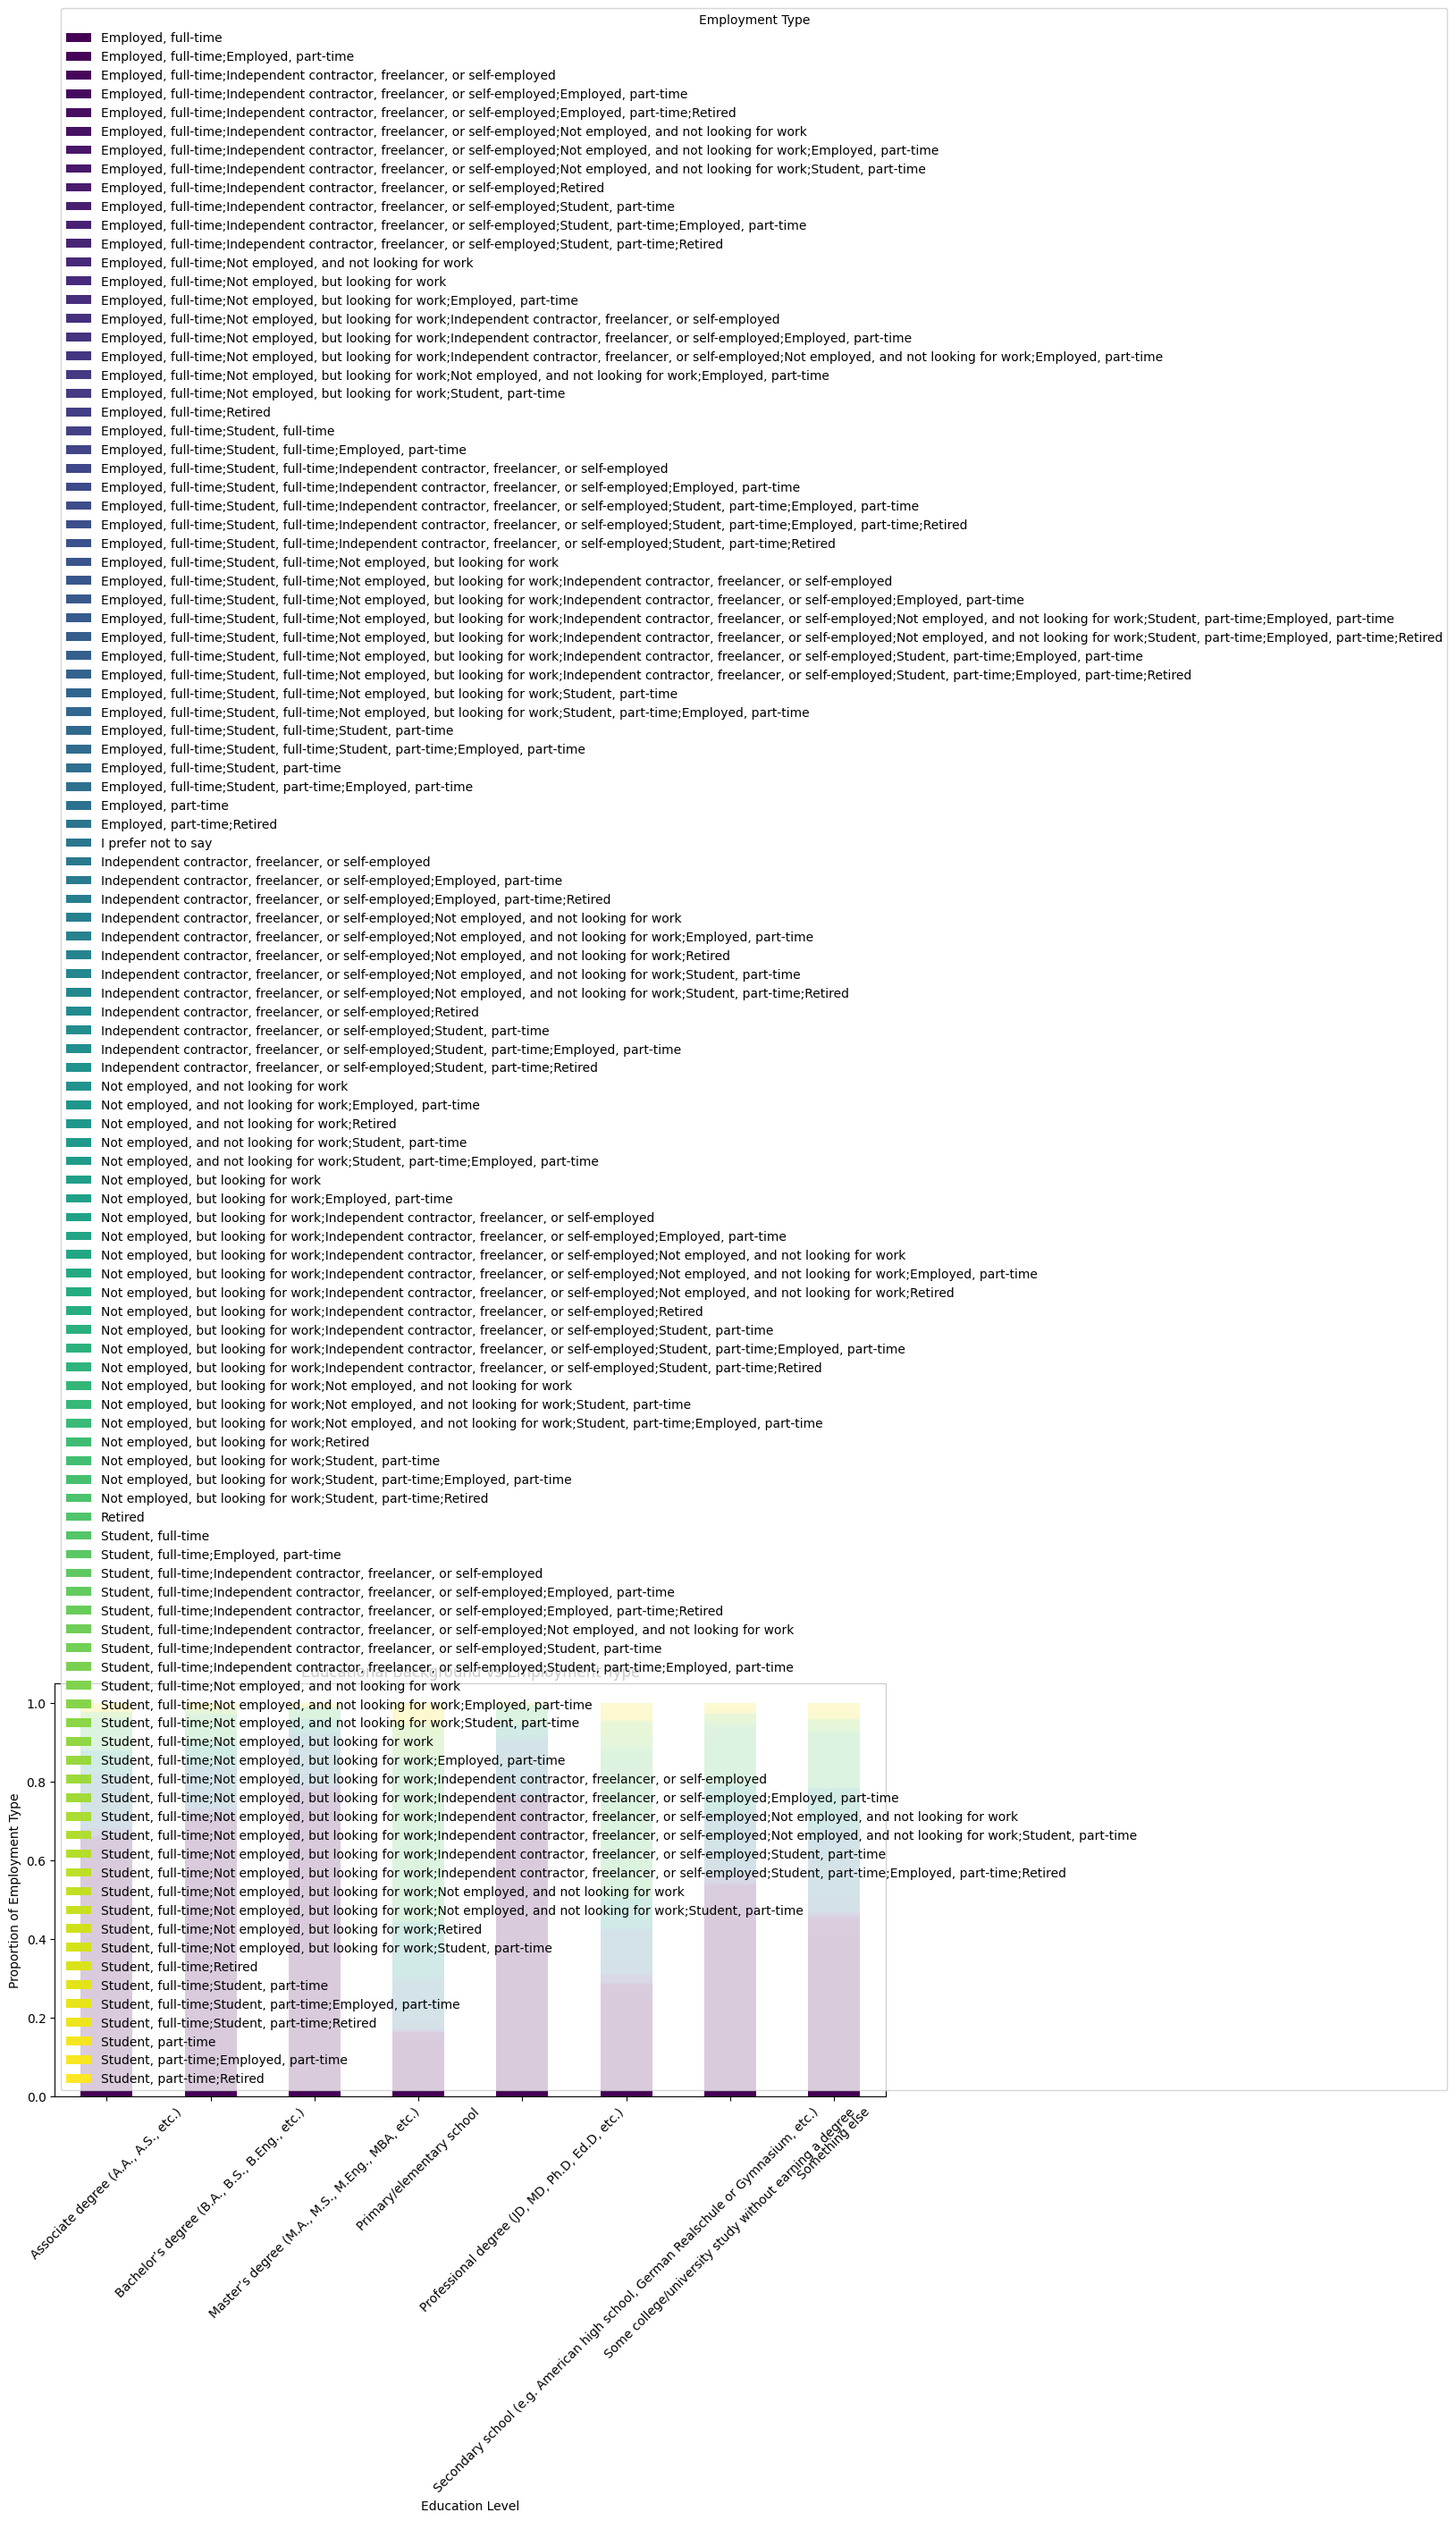

In [ ]:
# Step 9: Educational Background and Employment Type
# Cross-tabulation between education level and employment type
edu_emp_ct = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')

# Visualization of education level vs. employment type
plt.figure(figsize=(12, 6))
edu_emp_ct.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6))
plt.title('Educational Background vs Employment Type')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Employment Type')
plt.xticks(rotation=45)
plt.legend(title='Employment Type')
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
# Step 10: Save the Cleaned and Analyzed Dataset
cleaned_data_path = 'cleaned_dataset.csv'
df.to_csv(cleaned_data_path, index=False)
print(f'Dataset saved successfully as {cleaned_data_path}')


Dataset saved successfully as cleaned_dataset.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
